In [1]:
# Importing libraries
from reddit_creds import reddit

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

from nltk.stem import WordNetLemmatizer

In [2]:
subreddit = reddit.subreddit('LiverpoolFC')

# Adjust the limit
posts = subreddit.new(limit=1300)

In [3]:
data = []
for post in posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])

# Turn into a dataframe
liverpool = pd.DataFrame(data, columns = ['created_utc', 'title', 'self_text', 'subreddit'])
liverpool.head()

,created_utc,title,self_text,subreddit
0,1.714059e+09,"[Ornstein] ""I very much doubt Nunez will be le...",,LiverpoolFC
1,1.714058e+09,Who is Arrne Slot? (Video Version),Here’s the video version of the tweet I shared...,LiverpoolFC
2,1.714057e+09,Let’s loosen up a little bit and play a game o...,I’ll kick us off in the comments.\n\n,LiverpoolFC
3,1.714055e+09,"Won 7, Lost 9 (in some cruel cruel ways). Fore...",Credit to B/R Football. What do we make of his...,LiverpoolFC
4,1.714052e+09,"Sky """"""interview"""""" with Slot",,LiverpoolFC


In [4]:
subreddit = reddit.subreddit('reddevils')

# Adjust the limit
posts = subreddit.new(limit=1300)

In [5]:
data = []
for post in posts:
    data.append([post.created_utc, post.title, post.selftext, post.subreddit])

# Turn into a dataframe
manu = pd.DataFrame(data, columns = ['created_utc', 'title', 'self_text', 'subreddit'])
manu.head()

,created_utc,title,self_text,subreddit
0,1.714059e+09,[Craig Hope] 🚨 Exclusive: Dougie Freedman a co...,,reddevils
1,1.714059e+09,Mike McGrath - Erik Ten Hag has not taken ques...,Erik ten Hag refused to take questions from a ...,reddevils
2,1.714059e+09,Going to Manchester and Old Trafford for the f...,Hi there!\n\nSo i am (colombian fan) travelli...,reddevils
3,1.714056e+09,Utd back up to sixth after Bruno blunts Blades...,,reddevils
4,1.714054e+09,[@ManUtd] Pledging our investment in youth ❤️ ...,,reddevils


In [6]:
# Number of posts from both subreddits
len(manu), len(liverpool)

(967, 951)

In [7]:
lemmatizer = WordNetLemmatizer()
liverpool['title'] = liverpool['title'].apply(lemmatizer.lemmatize)
manu['title'] = manu['title'].apply(lemmatizer.lemmatize)

liverpool['self_text'] = liverpool['self_text'].apply(lemmatizer.lemmatize)
manu['self_text'] = manu['self_text'].apply(lemmatizer.lemmatize)

In [8]:
# Defining helper function to get lengths of self text and title
def getting_lengths(df):
    df['title_count'] = df['title'].apply(len)
    df['self_text_count'] = df['self_text'].apply(len)
    df['title_word_count'] = df['title'].apply(lambda x: len(x.split()))
    df['self_text_word_count'] = df['self_text'].apply(lambda x: len(x.split()))

In [9]:
# applying to both datasets
getting_lengths(liverpool)
getting_lengths(manu)

In [10]:
liverpool.head()

,created_utc,title,self_text,subreddit,title_count,self_text_count,title_word_count,self_text_word_count
0,1.714059e+09,"[Ornstein] ""I very much doubt Nunez will be le...",,LiverpoolFC,52,0,9,0
1,1.714058e+09,Who is Arrne Slot? (Video Version),Here’s the video version of the tweet I shared...,LiverpoolFC,34,253,6,48
2,1.714057e+09,Let’s loosen up a little bit and play a game o...,I’ll kick us off in the comments.\n\n,LiverpoolFC,57,35,14,7
3,1.714055e+09,"Won 7, Lost 9 (in some cruel cruel ways). Fore...",Credit to B/R Football. What do we make of his...,LiverpoolFC,123,140,22,25
4,1.714052e+09,"Sky """"""interview"""""" with Slot",,LiverpoolFC,29,0,4,0


In [11]:
manu.head()

,created_utc,title,self_text,subreddit,title_count,self_text_count,title_word_count,self_text_word_count
0,1.714059e+09,[Craig Hope] 🚨 Exclusive: Dougie Freedman a co...,,reddevils,193,0,32,0
1,1.714059e+09,Mike McGrath - Erik Ten Hag has not taken ques...,Erik ten Hag refused to take questions from a ...,reddevils,158,3127,28,531
2,1.714059e+09,Going to Manchester and Old Trafford for the f...,Hi there!\n\nSo i am (colombian fan) travelli...,reddevils,55,515,10,101
3,1.714056e+09,Utd back up to sixth after Bruno blunts Blades...,,reddevils,67,0,14,0
4,1.714054e+09,[@ManUtd] Pledging our investment in youth ❤️ ...,,reddevils,163,0,25,0


In [12]:
# Defining helper function to get longest and shortest titles
def longest_shortest(df, col):
    print(df.sort_values(by=col, ascending=False)[['title',col]].head(5))
    print(df.sort_values(by=col, ascending=False)[['title',col]].tail(5))

### Longest and shortest titles by characters

In [13]:
longest_shortest(liverpool, 'title_count')

                                                 title  title_count
739  [Ornstein and Pearce]What happened with Xabi A...          300
933  [Premier League] Howard Webb explains the foll...          300
947  [Berger] Johan Bakayoko (20/🇧🇪) is a summer to...          298
168  Schweinsteiger on why Manchester United haven'...          297
915  [Martin Volkmar via Romano] Bayern’s Uli Hoene...          297
               title  title_count
139  Fulham line up.           15
432  Well said boss🙌           15
198  We can do this.           15
443  PL Watch Thread           15
477  Sky predictions           15


In [75]:
longest_shortest(manu, 'title_count')

                                                 title  title_count
685  [Press Con. Part 2] Ten Hag: “We have to save ...          300
766  [BILD+] Borussia Dortmund is pursuing a secret...          300
630  [Post Match Quotes] Amad: "Dream come true. Th...          300
869  [Post Match Quotes] Ten Hag: "I think it was a...          300
131  [Press Con. - Part 2] Ten Hag: "I don't have a...          300
            title  title_count
464  Match thread           12
260   Rival Watch           11
704    Top 4 run?           10
231     PL watch             9
405      PL watch            8


### Longest and shortest titles by word count

In [14]:
longest_shortest(liverpool, 'title_word_count')

                                                 title  title_word_count
210  "I remember that I said, 'if we fail, let's do...                59
739  [Ornstein and Pearce]What happened with Xabi A...                53
227  [Dale Johnson] Sick of keepers holding the bal...                53
103  Trent Alexander-Arnold (73) has now been direc...                52
168  Schweinsteiger on why Manchester United haven'...                52
                title  title_word_count
89   Analysis Tuesday                 2
946  Analysis Tuesday                 2
57   Ref Allegiances                  2
812  Analysis Tuesday                 2
698  🇮🇪🇮🇪🇮🇪🇮🇪🇧🇷🇧🇷🇧🇷🇧🇷                 1


In [76]:
longest_shortest(manu, 'title_word_count')

                                                 title  title_word_count
81   Conceded:  2 in 4 mins vs Bayern.   2 in 4 min...                64
131  [Press Con. - Part 2] Ten Hag: "I don't have a...                61
359  [Press Conference] Ten Hag on Sunday's game: ‘...                60
653  FA Cup semi-final appearances by the 2023/24 f...                60
250  Luca Toni on Van Gaal: "He has a bad temper an...                59
                title  title_word_count
917  Daily Discussion                 2
178  Daily Discussion                 2
864  Daily Discussion                 2
564  Daily Discussion                 2
813  Daily Discussion                 2


In [15]:
# Defining helper function to get longest and shortest self_text
def longest_shortest_self(df, col):
    print(df.sort_values(by=col, ascending=False)[['self_text',col]].head(5))
    print(df.sort_values(by=col, ascending=False)[['self_text',col]].tail(5))

### Longest and shortest self_text by character

In [16]:
# Getting title character counts
longest_shortest_self(liverpool, 'title_count')

                                             self_text  title_count
739                                                             300
933                                                             300
947  https://x.com/berger_pj/status/176977693092705...          298
168  Good to see how positively Schweinsteiger rega...          297
915                                                             297
                                             self_text  title_count
139                                                              15
432                                                              15
198                                                              15
443  Sigh….\n\nI don’t blame y’all if you don’t wan...           15
477  Sky is predicting we beat united 6-1. Surely n...           15


In [77]:
longest_shortest_self(manu, 'title_count')

                                             self_text  title_count
685  **Simon Stone**\n\nEtH on if Mason Mount can b...          300
766                                                             300
630  # Erik ten Hag\n\n Erik ten Hag: "I am very pr...          300
869  # Erik ten Hag\n\nErik ten Hag says there was ...          300
131  # KEY QUOTES: TEN HAG TALKS VAN GAAL, INJURIES...          300
                                             self_text  title_count
464                                           Modsssss           12
260  \nScum vs Atalanta (Not a US state with weird ...           11
704                                                              10
231  #Newcastle vs Spurs (4-0) FT\n\nAnddddddd as I...            9
405  Arsenal 2 - Luton 0\n\nBrentford 0 - Brighton ...            8


### Longest and shortest self_text by word count

In [17]:
# Getting title word counts
longest_shortest_self(liverpool, 'title_word_count')

                                             self_text  title_word_count
210                                                                   59
739                                                                   53
227                                                                   53
103                                                                   52
168  Good to see how positively Schweinsteiger rega...                52
                                             self_text  title_word_count
89    \n\nWe've all recovered from the matchday, we...                 2
946   \n\nWe've all recovered from the matchday, we...                 2
57   Saw this and found it quite interesting. Alway...                 2
812   \n\nWe've all recovered from the matchday, we...                 2
698                                                                    1


In [78]:
longest_shortest_self(manu, 'title_word_count')

                                             self_text  title_word_count
81   Mentality issue? Ten Hag has a lot of blame bu...                64
131  # KEY QUOTES: TEN HAG TALKS VAN GAAL, INJURIES...                61
359  Erik ten Hag's Pre-Match Press Conference | Un...                60
653                                                                   60
250                                                                   59
                                             self_text  title_word_count
917  Daily discussion on Manchester United. \n\n&#x...                 2
178  Daily discussion on Manchester United. \n\n&#x...                 2
864  Daily discussion on Manchester United. \n\n&#x...                 2
564  Daily discussion on Manchester United. \n\n&#x...                 2
813  Daily discussion on Manchester United. \n\n&#x...                 2


## Visualizing distributions

### Title count distribution

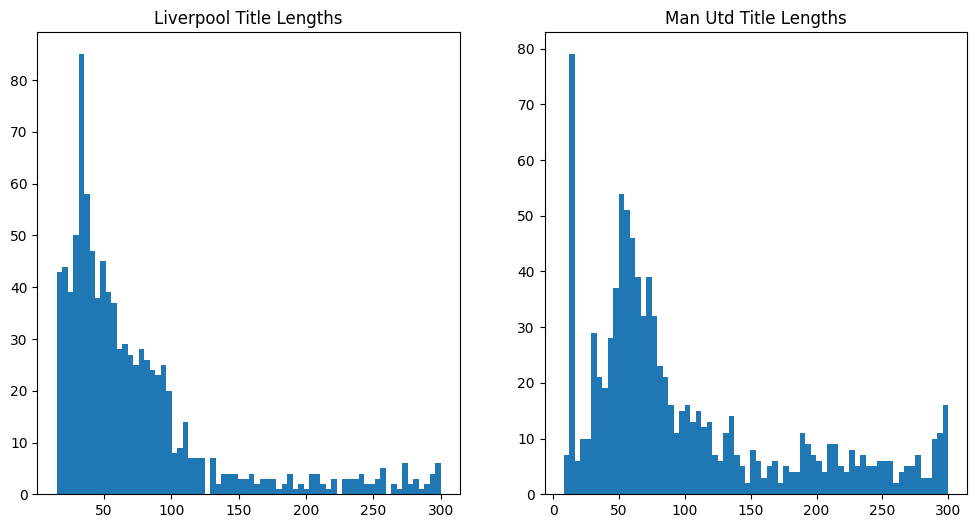

In [18]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(liverpool['title_count'], bins=70)

ax[1].hist(manu['title_count'], bins=70)

ax[0].set_title('Liverpool Title Lengths')
ax[1].set_title('Man Utd Title Lengths')

plt.show()

### Self text count distribution

Text(0.5, 1.0, 'Man Utd Self Text Lengths')

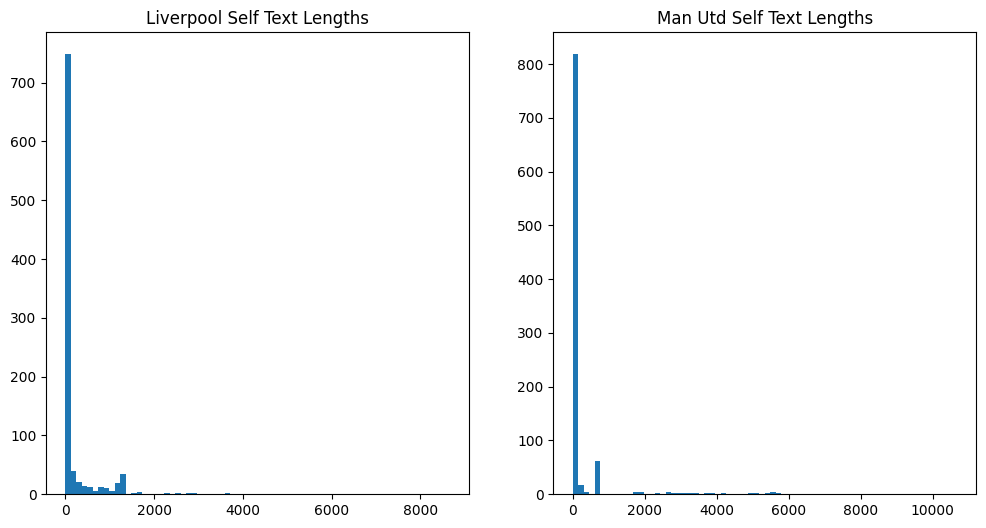

In [19]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(liverpool['self_text_count'], bins=70)

ax[1].hist(manu['self_text_count'], bins=70)

ax[0].set_title('Liverpool Self Text Lengths')
ax[1].set_title('Man Utd Self Text Lengths')

### Title word count distribution

Text(0.5, 1.0, 'Man Utd Title Word Counts')

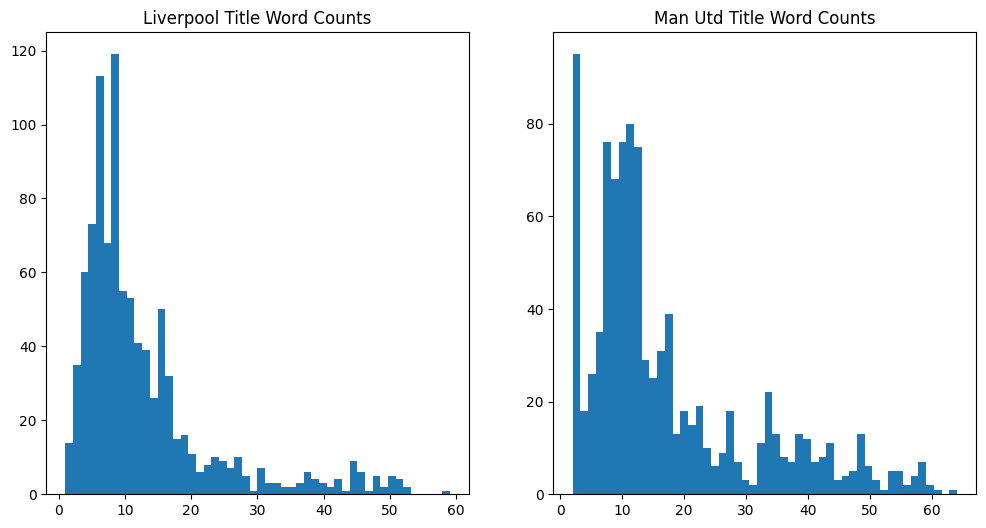

In [20]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(liverpool['title_word_count'], bins=50)

ax[1].hist(manu['title_word_count'], bins=50)

ax[0].set_title('Liverpool Title Word Counts')
ax[1].set_title('Man Utd Title Word Counts')

### Self text word count distribution

Text(0.5, 1.0, 'Man Utd Self Text Word Counts')

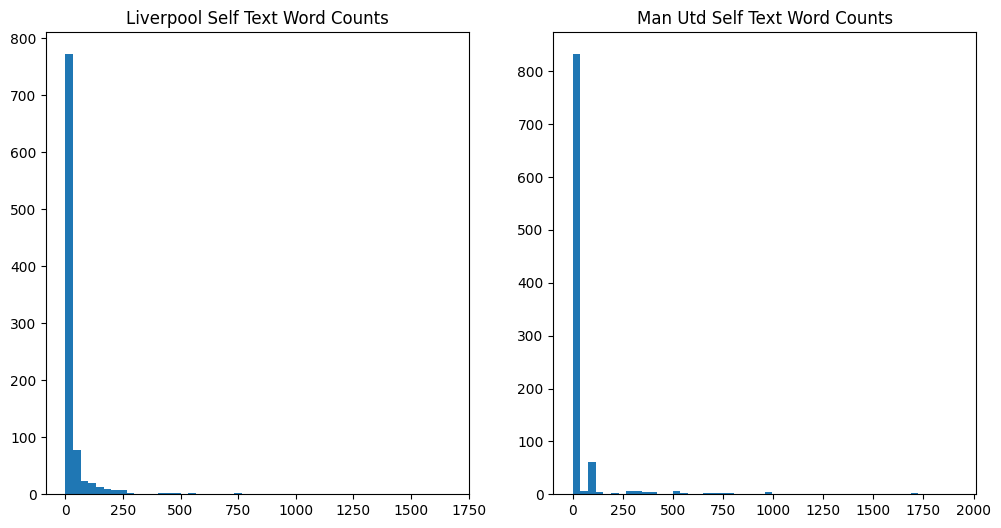

In [21]:
fig, ax = plt.subplots(1,2, figsize=(12,6))

ax[0].hist(liverpool['self_text_word_count'], bins=50)

ax[1].hist(manu['self_text_word_count'], bins=50)

ax[0].set_title('Liverpool Self Text Word Counts')
ax[1].set_title('Man Utd Self Text Word Counts')

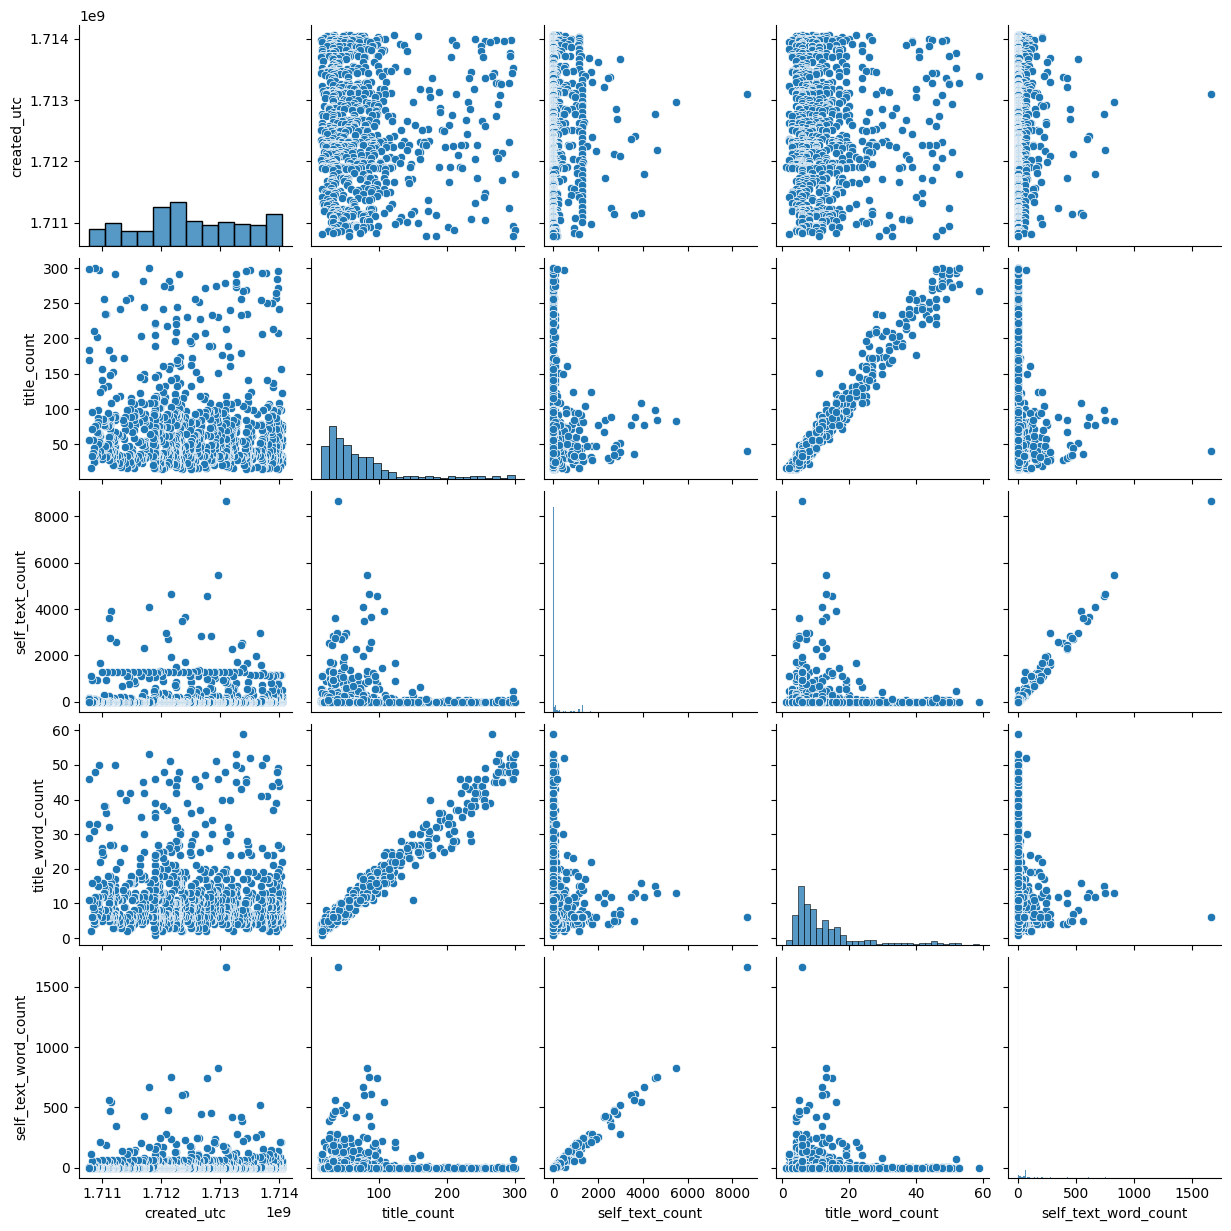

In [22]:
sns.pairplot(liverpool)

In [23]:
# Creating a combined dataset
combined = pd.concat([liverpool, manu])

In [24]:
# Dropping timestamps
combined.drop('created_utc', axis=1, inplace=True)

In [25]:
combined.head()

,title,self_text,subreddit,title_count,self_text_count,title_word_count,self_text_word_count
0,"[Ornstein] ""I very much doubt Nunez will be le...",,LiverpoolFC,52,0,9,0
1,Who is Arrne Slot? (Video Version),Here’s the video version of the tweet I shared...,LiverpoolFC,34,253,6,48
2,Let’s loosen up a little bit and play a game o...,I’ll kick us off in the comments.\n\n,LiverpoolFC,57,35,14,7
3,"Won 7, Lost 9 (in some cruel cruel ways). Fore...",Credit to B/R Football. What do we make of his...,LiverpoolFC,123,140,22,25
4,"Sky """"""interview"""""" with Slot",,LiverpoolFC,29,0,4,0


In [26]:
# Initializing label encoder
le = LabelEncoder()

In [27]:
# Fitting on target variable
le.fit(['LiverpoolFC', 'reddevils'])

LabelEncoder()

In [28]:
# Transforming target variable
combined['subreddit'] = le.transform(combined['subreddit'])

In [29]:
# Creating train and test splits
X = combined.drop('subreddit', axis=1)
y = combined['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Initializing TF-IDF vectorizer and fitting on train data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_fit = tfidf.fit_transform(X_train['title'])

In [31]:
# Transforming test data
test_title = tfidf.transform(X_test['title'])

In [32]:
# Creating a dataframe of transformed train data
tfid_vectorized_title = pd.DataFrame(tfidf_fit.toarray(), columns=tfidf.get_feature_names_out())

In [33]:
# Creating a dataframe of transformed test data
test_title_vectorized = pd.DataFrame(test_title.toarray(), columns=tfidf.get_feature_names_out())

In [34]:
# Initializing TF-IDF vectorizer and fitting on train data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_fit = tfidf.fit_transform(X_train['self_text'])

In [35]:
# Transforming test data
test_self_text = tfidf.transform(X_test['self_text'])

In [36]:
# Creating a dataframe of transformed train data
test_self_text_vectorized = pd.DataFrame(test_self_text.toarray(), columns=tfidf.get_feature_names_out())

In [37]:
# Creating a dataframe of transformed test data
tfid_vectorized_self_text = pd.DataFrame(tfidf_fit.toarray(), columns=tfidf.get_feature_names_out())

In [38]:
# Shapes of train and test data
tfid_vectorized_title.shape, tfid_vectorized_self_text.shape

((1342, 3379), (1342, 4959))

In [39]:
# Resetting train index
X_train.reset_index(inplace=True, drop=True)

In [40]:
# Resetting test index
X_test.reset_index(inplace=True, drop=True)

In [41]:
# Concatenating train datasets
X_train_new = pd.concat([X_train.drop(['self_text', 'title'], axis=1), tfid_vectorized_self_text, tfid_vectorized_title], axis=1)

In [42]:
# Concatenating test datasets
X_test_new = pd.concat([X_test.drop(['self_text', 'title'], axis=1), test_self_text_vectorized, test_title_vectorized], axis=1)

In [43]:
# Checking shape
X_train_new.shape, X_test_new.shape

((1342, 8342), (576, 8342))

In [44]:
# Initializing StandardScaler
scaler = StandardScaler()

In [45]:
# Scaling train data
X_train_scaled = scaler.fit_transform(X_train_new)

In [46]:
# Scaling test data
X_test_scaled = scaler.transform(X_test_new)

In [47]:
# Training Logistic Regression Model
model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)

/Users/naveenmsu/miniforge3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [48]:
# Checking train accuracy
model1.score(X_train_scaled, y_train)

0.9992548435171386

In [49]:
# Checking test accuracy
model1.score(X_test_scaled, y_test)

0.8472222222222222

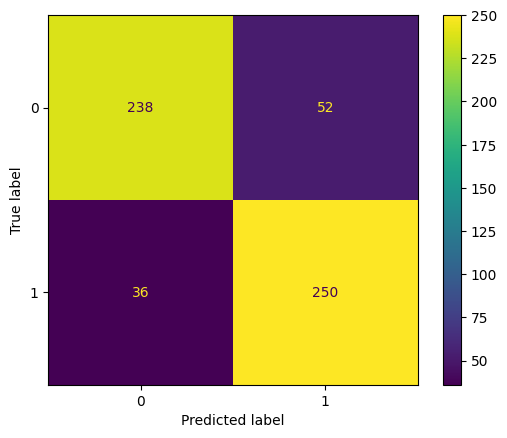

In [50]:
# Confusion Matrix of model 1
ConfusionMatrixDisplay.from_estimator(model1, X_test_scaled, y_test)

<Axes: >

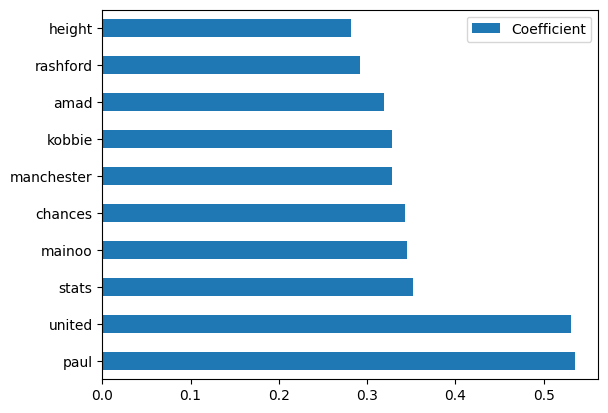

In [73]:
# Model 1 important features positively correlated to Man U
pd.DataFrame(model1.coef_.reshape(-1,1), index=X_train_new.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False).head(10).plot(kind='barh')

<Axes: >

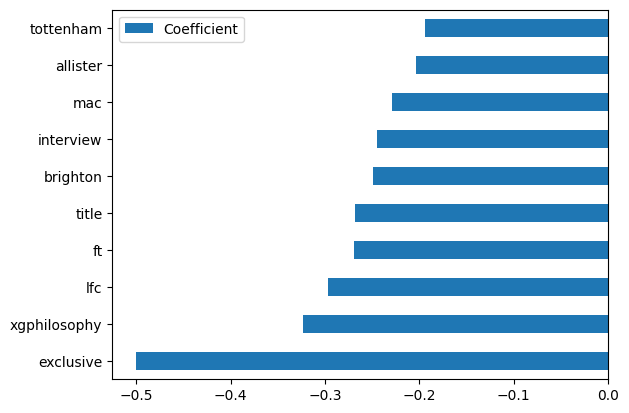

In [72]:
# Model 1 important features negatively correlated to Man U (positively correlated to Liverpool FC)
pd.DataFrame(model1.coef_.reshape(-1,1), index=X_train_new.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=True).head(10).plot(kind='barh')

In [51]:
# Training Random Forest Classifier
model2 = RandomForestClassifier()
model2.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [52]:
# Scoring on train data
model2.score(X_train_scaled, y_train)

0.9992548435171386

In [53]:
# Scoring on test data
model2.score(X_test_scaled, y_test)

0.90625

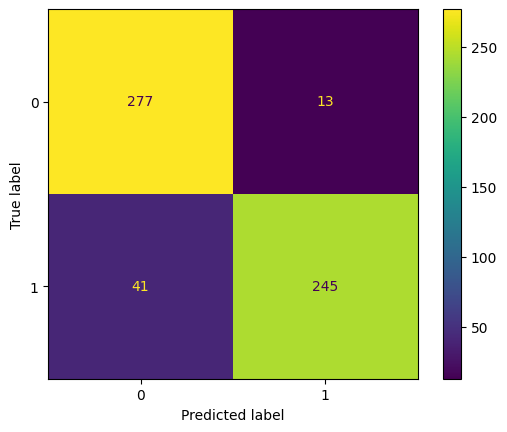

In [54]:
# Confusion Matrix on model 2
ConfusionMatrixDisplay.from_estimator(model2, X_test_scaled, y_test)

The Random Forest Classifier has a higher accuracy than the Logistic Regression Model. Although both models exhibit overfitting behavior.

<Axes: >

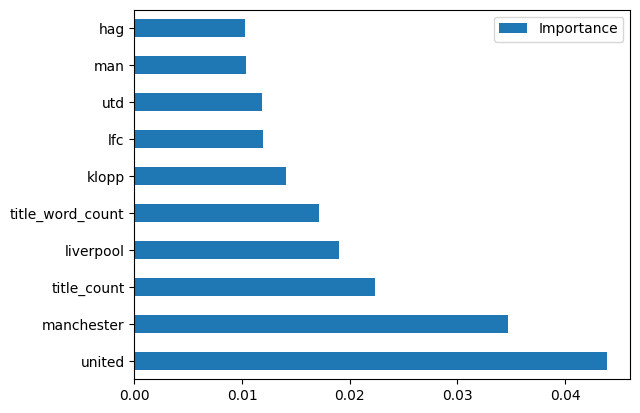

In [74]:
# Model 2 important features
pd.DataFrame(model2.feature_importances_, index=X_train_new.columns, columns=['Importance']).sort_values(by='Importance', ascending=False).head(10).plot(kind='barh')

In [ ]:
model2.predict()